In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# A. TINGKAT NASIONAL DAN PROVINSI

**1. Load dataset & pra-proses data untuk tingkat provinsi periode 2015-2019**

In [0]:
df1 = pd.read_excel('/content/drive/My Drive/DATASET_UN/UN_SMA_IPS_2019_NS.xlsx')
df1cop = df1.copy()
df2 = pd.read_excel('/content/drive/My Drive/DATASET_UN/UNSMAIPS2018.xlsx')
df3 = pd.read_excel('/content/drive/My Drive/DATASET_UN/UNSMAIPS2017.xlsx')
df4 = pd.read_excel('/content/drive/My Drive/DATASET_UN/UNSMAIPS2016.xlsx')
df5 = pd.read_excel('/content/drive/My Drive/DATASET_UN/UNSMAIPS2015.xlsx')

*Pra-proses untuk membuat dataset perubahan nilai tiap tahunnya berdasarkan nilai nasional

In [0]:
import numpy as np
unyear = [df5,df4,df3,df2,df1cop]
year = pd.DataFrame (columns=df1.columns)
year.columns = [c.replace(' ', '_') for c in year.columns]
for i in unyear:
    i.columns = [c.replace(' ', '_') for c in i.columns]
    i = i.loc[i.NAMA_PROVINSI == 'NASIONAL'] 
    year=year.append(i)
                
year = year.drop(['NAMA_PROVINSI','NO','KODE'],axis=1)
year['TAHUN'] = [2015,2016,2017,2018,2019]
year = year.reset_index()
year = year.drop(['index'],axis=1)
year.head(10)
    

,JUMLAH_SATUAN_PENDIDIKAN,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI,TAHUN
0,17361,852878,67.36,58.43,55.76,54.92,59.00,51.55,57.84,2015
1,17944,844960,59.76,46.81,48.29,53.79,51.70,56.33,52.78,2016
2,18360,876201,59.37,41.34,38.09,50.26,54.99,49.77,47.93,2017
3,18784,955232,58.46,41.57,32.72,47.05,51.17,49.37,45.69,2018
4,19076,956433,58.53,43.56,34.17,51.39,51.25,49.12,46.75,2019


**2.Visualisasi Data**

**Statistik perubahan nilai tiap mata-pelajaran tiap tahunnya**

Perubahan Nilai Rata-Rata Ujian Nasional Setiap Mata Pelajaran dari Tahun ke Tahun


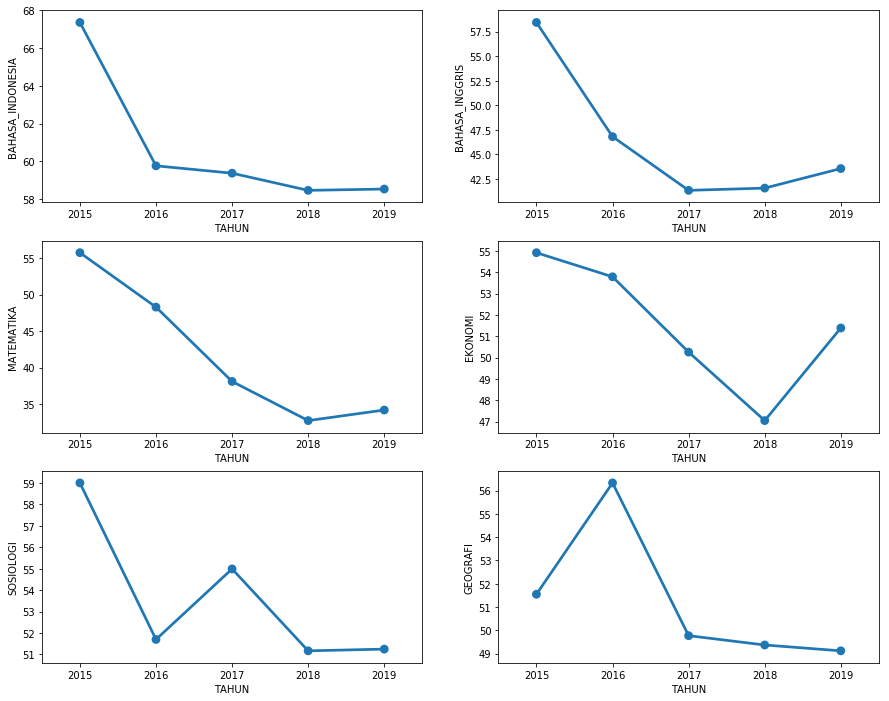

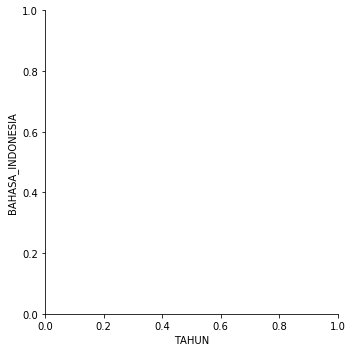

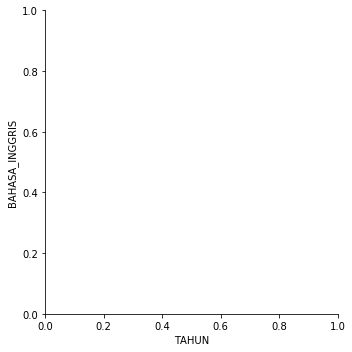

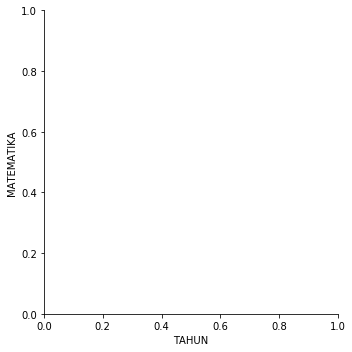

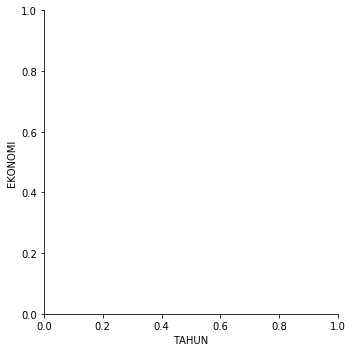

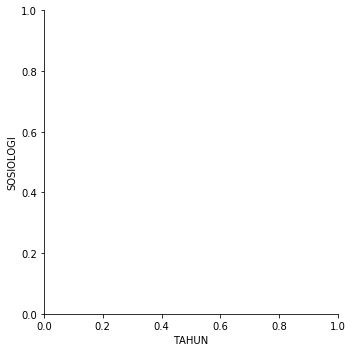

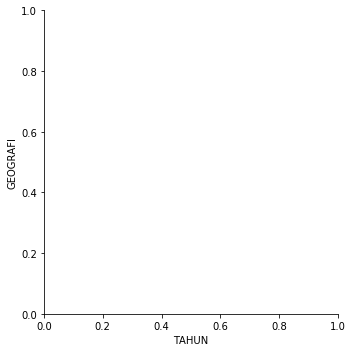

In [0]:
fig,axes = plt.subplots(3,2)
fig.set_size_inches(15, 12)
print('Perubahan Nilai Rata-Rata Ujian Nasional Setiap Mata Pelajaran dari Tahun ke Tahun')
sns.catplot(y='BAHASA_INDONESIA', x='TAHUN', data=year, ax=axes[0,0] ,kind = 'point')
sns.catplot(y='BAHASA_INGGRIS', x='TAHUN', data=year, ax=axes[0,1] ,kind = 'point')
sns.catplot(y='MATEMATIKA', x='TAHUN', data=year, ax=axes[1,0] ,kind = 'point')
sns.catplot(y='EKONOMI', x='TAHUN', data=year, ax=axes[1,1] ,kind = 'point')
sns.catplot(y='SOSIOLOGI', x='TAHUN', data=year, ax=axes[2,0] ,kind = 'point')
sns.catplot(y='GEOGRAFI', x='TAHUN', data=year, ax=axes[2,1] ,kind = 'point')


**Perubahan rata-rata Nilai UN periode 2015-2019**

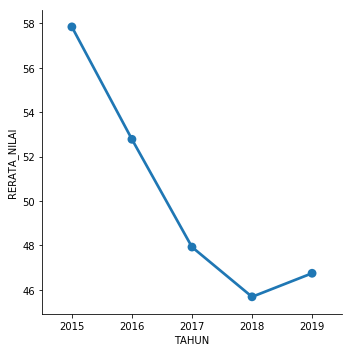

In [0]:
sns.catplot(y='RERATA_NILAI', x='TAHUN', data=year ,kind = 'point')

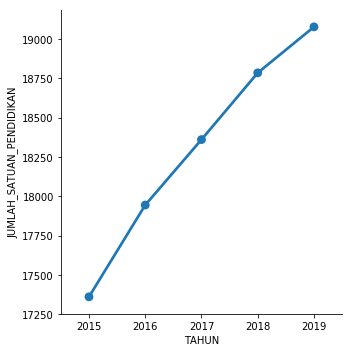

In [0]:
sns.catplot(y='JUMLAH_SATUAN_PENDIDIKAN', x='TAHUN', data=year ,kind = 'point')

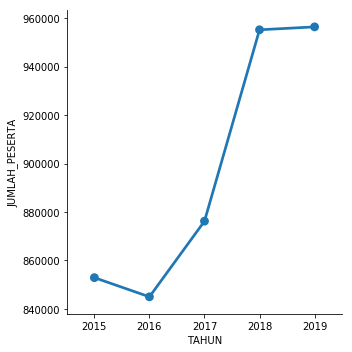

In [0]:
sns.catplot(y='JUMLAH_PESERTA', x='TAHUN', data=year ,kind = 'point')

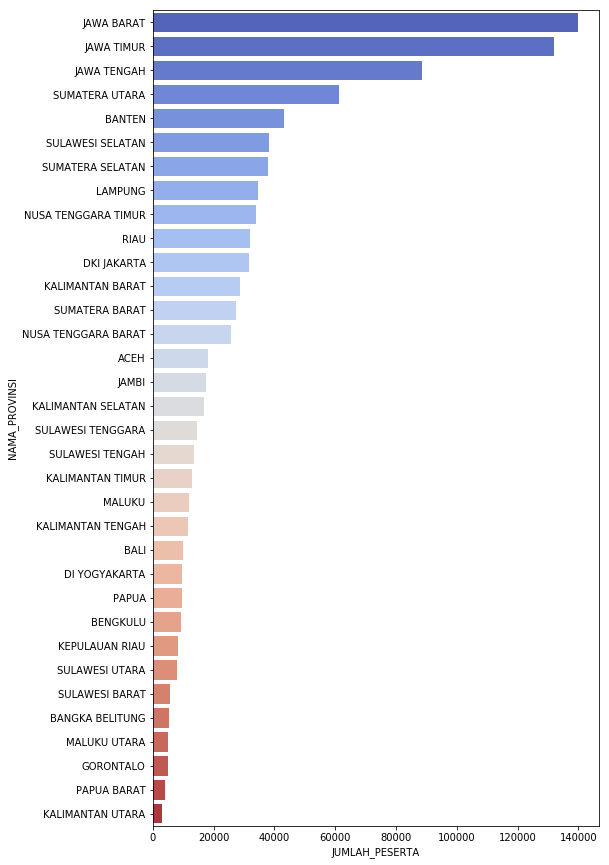

In [0]:

dfjumlah=df1cop.copy()

dfjumlah = dfjumlah[dfjumlah.NAMA_PROVINSI!='NASIONAL']


plt.figure(figsize=(8,15))
sns.barplot(x='JUMLAH_PESERTA', y='NAMA_PROVINSI', data=dfjumlah.sort_values('JUMLAH_PESERTA',ascending = False),palette="coolwarm")

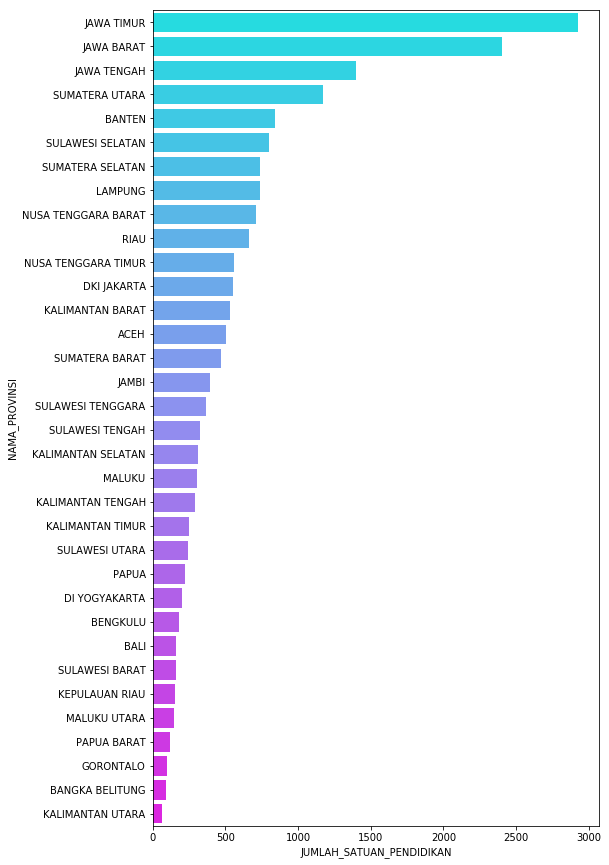

In [0]:
plt.figure(figsize=(8,15))
sns.barplot(x='JUMLAH_SATUAN_PENDIDIKAN', y='NAMA_PROVINSI', data=dfjumlah.sort_values('JUMLAH_SATUAN_PENDIDIKAN',ascending = False),palette="cool")

In [0]:
dfjumlah.sort_values('JUMLAH_PESERTA',ascending= False ).head()

,NO,KODE,NAMA_PROVINSI,JUMLAH_SATUAN_PENDIDIKAN,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI
1,2.0,2,JAWA BARAT,2401,139841,60.28,45.51,33.84,52.10,52.97,50.14,47.98
4,5.0,5,JAWA TIMUR,2925,132049,60.72,44.90,35.78,53.16,52.60,53.56,48.57
2,3.0,3,JAWA TENGAH,1396,88592,69.18,48.24,38.89,60.14,59.49,58.49,53.91
6,7.0,7,SUMATERA UTARA,1171,61306,52.95,41.69,33.77,47.15,46.73,44.45,43.66
29,30.0,30,BANTEN,841,43342,56.40,44.60,33.40,50.69,50.24,47.72,46.05


**Nilai rata-rata UN tertinggi tiap mata-pelajaran jurusan IPS pada tahun 2019 tingkat Provinsi**

5 Provinsi dengan Rata-Rata Nilai UN Tertinggi untuk Setiap Mata Pelajaran


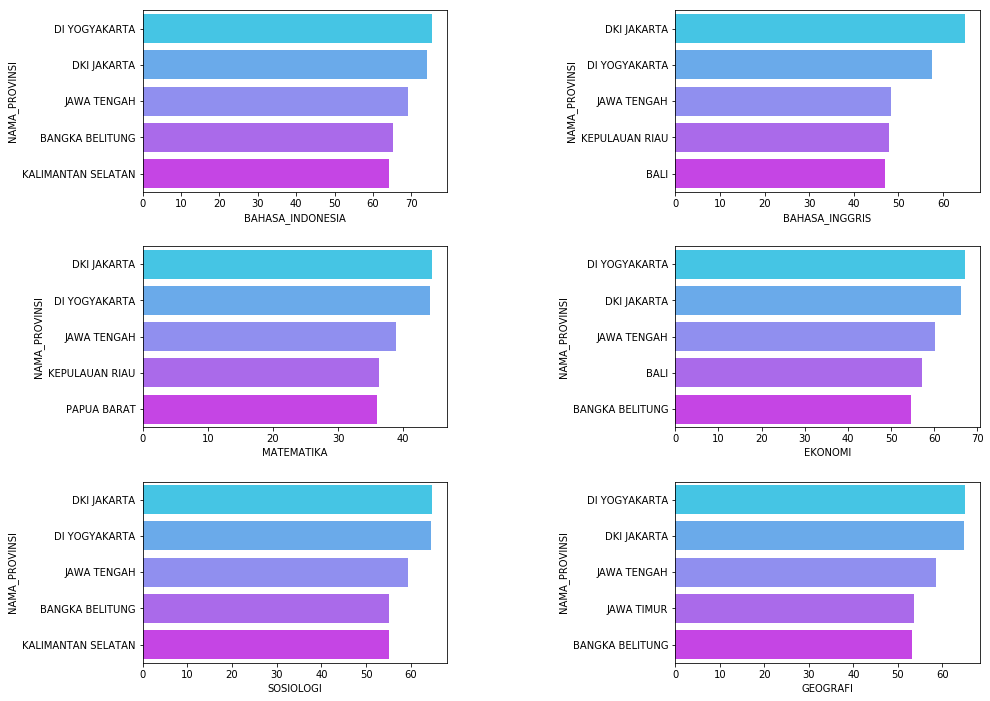

In [0]:
df1.columns = [c.replace(' ', '_') for c in df1.columns]

fig,axes = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(15, 12)
print('5 Provinsi dengan Rata-Rata Nilai UN Tertinggi untuk Setiap Mata Pelajaran')
sns.barplot(x='BAHASA_INDONESIA', y='NAMA_PROVINSI', data=df1.sort_values('BAHASA_INDONESIA',ascending = False).head(5),ax=axes[0,0],palette="cool")
sns.barplot(x='BAHASA_INGGRIS', y='NAMA_PROVINSI', data=df1.sort_values('BAHASA_INGGRIS',ascending = False).head(5),ax=axes[0,1],palette="cool")
sns.barplot(x='MATEMATIKA', y='NAMA_PROVINSI', data=df1.sort_values('MATEMATIKA',ascending = False).head(5),ax=axes[1,0],palette="cool")
sns.barplot(x='EKONOMI', y='NAMA_PROVINSI', data=df1.sort_values('EKONOMI',ascending = False).head(5),ax=axes[1,1],palette="cool")
sns.barplot(x='SOSIOLOGI', y='NAMA_PROVINSI', data=df1.sort_values('SOSIOLOGI',ascending = False).head(5),ax=axes[2,0],palette="cool")
sns.barplot(x='GEOGRAFI', y='NAMA_PROVINSI', data=df1.sort_values('GEOGRAFI',ascending = False).head(5),ax=axes[2,1],palette="cool")


**Nilai rata-rata UN terendah tiap mata-pelajaran jurusan IPS pada tahun 2019 tingkat Provinsi**

5 Provinsi dengan Rata-Rata Nilai UN Terendah untuk Setiap Mata Pelajaran


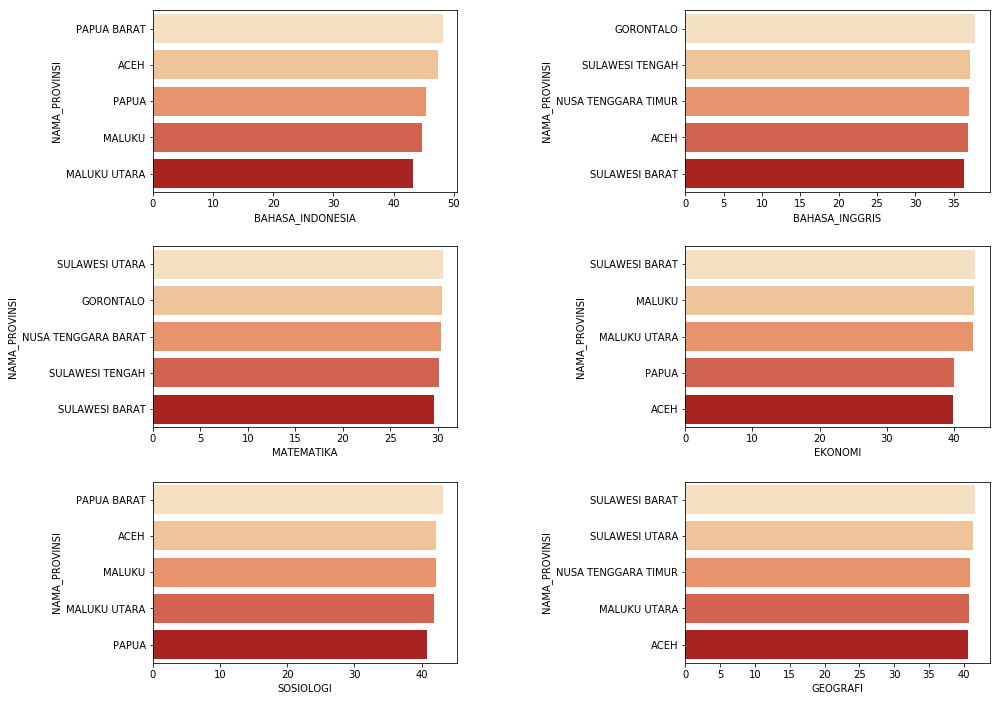

In [0]:
fig,axes = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(15,12)
print('5 Provinsi dengan Rata-Rata Nilai UN Terendah untuk Setiap Mata Pelajaran')
sns.barplot(x='BAHASA_INDONESIA', y='NAMA_PROVINSI', data=df1.sort_values('BAHASA_INDONESIA',ascending = False).tail(5),ax=axes[0,0],palette="OrRd")
sns.barplot(x='BAHASA_INGGRIS', y='NAMA_PROVINSI', data=df1.sort_values('BAHASA_INGGRIS',ascending = False).tail(5),ax=axes[0,1],palette="OrRd")
sns.barplot(x='MATEMATIKA', y='NAMA_PROVINSI', data=df1.sort_values('MATEMATIKA',ascending = False).tail(5),ax=axes[1,0],palette="OrRd")
sns.barplot(x='EKONOMI', y='NAMA_PROVINSI', data=df1.sort_values('EKONOMI',ascending = False).tail(5),ax=axes[1,1],palette="OrRd")
sns.barplot(x='SOSIOLOGI', y='NAMA_PROVINSI', data=df1.sort_values('SOSIOLOGI',ascending = False).tail(5),ax=axes[2,0],palette="OrRd")
sns.barplot(x='GEOGRAFI', y='NAMA_PROVINSI', data=df1.sort_values('GEOGRAFI',ascending = False).tail(5),ax=axes[2,1],palette="OrRd")


**Perolehan 5 nilai rata-rata UN tertinggi dan terendah jurusan IPS tingkat Provinsi**

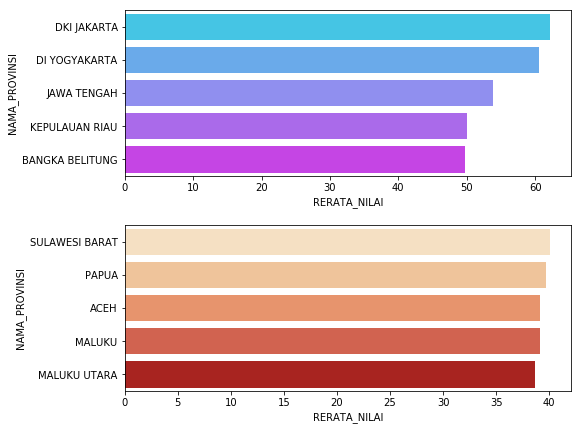

In [0]:
fig,axes = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(8, 7)
sns.barplot(x='RERATA_NILAI', y='NAMA_PROVINSI', data=df1.sort_values('RERATA_NILAI',ascending = False).head(5),ax=axes[0],palette="cool")
sns.barplot(x='RERATA_NILAI', y='NAMA_PROVINSI', data=df1.sort_values('RERATA_NILAI',ascending = False).tail(5),ax=axes[1],palette="OrRd")

# B. Tingkat Kota/Kabupaten

**1. Load dataset & pra-proses data untuk tingkat kota/kabupaten periode 2019**

In [0]:
DKI = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/DKI.xlsx')
DIY = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/DIY.xlsx')
JABAR = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/JABAR.xlsx')
JATENG = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/JATENG.xlsx')
JATIM = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/JATIM.xlsx')
JAMBI = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/JAMBI.xlsx')
BANTEN = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/BANTEN.xlsx')
SUMSEL = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SUMSEL.xlsx')
SUMUT = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SUMUT.xlsx')
SUMBAR = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SUMBAR.xlsx')
LAMPUNG = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/LAMPUNG.xlsx')
RIAU = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/RIAU.xlsx')
KEPRIAU = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/KEPRIAU.xlsx')
BELITUNG = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/BELITUNG.xlsx')
BENGKULU = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/BENGKULU.xlsx')
ACEH = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/ACEH.xlsx')
KALSEL= pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/KALSEL.xlsx')
KALBAR = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/KALBAR.xlsx')
KALTIM = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/KALTIM.xlsx')
KALUT = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/KALUT.xlsx')
KALTENG = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/KALTENG.xlsx')
SULSEL = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SULSEL.xlsx')
SULUT = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SULUT.xlsx')
SULTENG = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SULTENG.xlsx')
SULBAR= pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SULBAR.xlsx')
SULTENGG = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SULTENGG.xlsx')
GORONTALO = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/GORONTALO.xlsx')
MALUKU = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/MALUKU.xlsx')
MALUKUUT = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/MALUKUUT.xlsx')
NTB = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/NTB.xlsx')
NTT = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/NTT.xlsx')
BALI = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/BALI.xlsx')
PAPUA = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/PAPUA.xlsx')
PAPUABAR = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/PAPUABAR.xlsx')


Pra-proses data(data cleaning)

In [0]:
provinsi= [DKI,DIY,JAMBI,JABAR,JATENG,JATIM,BANTEN,LAMPUNG,BELITUNG,SUMSEL,RIAU,BENGKULU,SUMUT,SUMBAR,ACEH,KEPRIAU,KALTIM,KALBAR,KALTENG
           ,KALUT,KALSEL,SULSEL,SULUT,SULTENG,SULTENGG,SULBAR,GORONTALO,MALUKU,MALUKUUT,NTB,NTT,BALI,PAPUA,PAPUABAR]
for i in provinsi :
    i.rename(columns={'Unnamed: 1':'KODE', 'Unnamed: 2':'NAMA_KOTA/KABUPATEN', 'Unnamed: 3':'JUMLAH_SATUAN_PENDIDIKAN', 'Unnamed: 4':'JUMLAH_PESERTA', 
                    'Unnamed: 5':'BAHASA_INDONESIA', 'Unnamed: 6':'BAHASA_INGGRIS', 'Unnamed: 7':'MATEMATIKA', 'Unnamed: 8':'EKONOMI',
                    'Unnamed: 9':'SOSIOLOGI', 'Unnamed: 10':'GEOGRAFI', 'Unnamed: 11':'RERATA_NILAI'},inplace=True )  
    i.dropna(inplace = True)
    i.drop(['CAPAIAN NILAI UJIAN NASIONAL'],axis=1)


In [0]:
kota = pd.concat(provinsi)
kota = kota.drop(['CAPAIAN NILAI UJIAN NASIONAL'],axis=1)
kota = kota.sort_values('KODE',ascending = True)
kota = kota.reset_index()
kota = kota.drop(['index'],axis=1)

In [0]:

kota.tail()

,KODE,NAMA_KOTA/KABUPATEN,JUMLAH_SATUAN_PENDIDIKAN,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI
509,3401,KABUPATEN BULUNGAN,16,658,61.49,42.16,29.98,45.5,53.41,47.83,45.99
510,3402,KOTA TARAKAN,12,847,66.54,46.31,32.08,54.94,55.68,50.15,49.68
511,3403,KABUPATEN NUNUKAN,15,859,55.87,39.18,29.86,47.05,48.89,45.1,43.29
512,3404,KABUPATEN MALINAU,19,559,53,38.8,30.61,45.43,49.4,44.45,42.44
513,3405,KABUPATEN TANA TIDUNG,3,135,59.29,40.96,31.04,51.37,52.65,43.3,45.17


In [0]:
kota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
KODE                        514 non-null object
NAMA_KOTA/KABUPATEN         514 non-null object
JUMLAH_SATUAN_PENDIDIKAN    514 non-null object
JUMLAH_PESERTA              514 non-null object
BAHASA_INDONESIA            514 non-null object
BAHASA_INGGRIS              514 non-null object
MATEMATIKA                  514 non-null object
EKONOMI                     514 non-null object
SOSIOLOGI                   514 non-null object
GEOGRAFI                    514 non-null object
RERATA_NILAI                514 non-null object
dtypes: object(11)
memory usage: 44.2+ KB


Merubah tipe data tiap kolom  

In [0]:
kota = kota.replace('-','0')
kota[['BAHASA_INDONESIA', 'BAHASA_INGGRIS','MATEMATIKA','EKONOMI','SOSIOLOGI','GEOGRAFI','RERATA_NILAI']] = kota[['BAHASA_INDONESIA', 
                                                                                                'BAHASA_INGGRIS','MATEMATIKA',
                                                                                                'EKONOMI','SOSIOLOGI','GEOGRAFI','RERATA_NILAI']].apply(pd.to_numeric)

5 Kota dengan UN IPS Terbaik


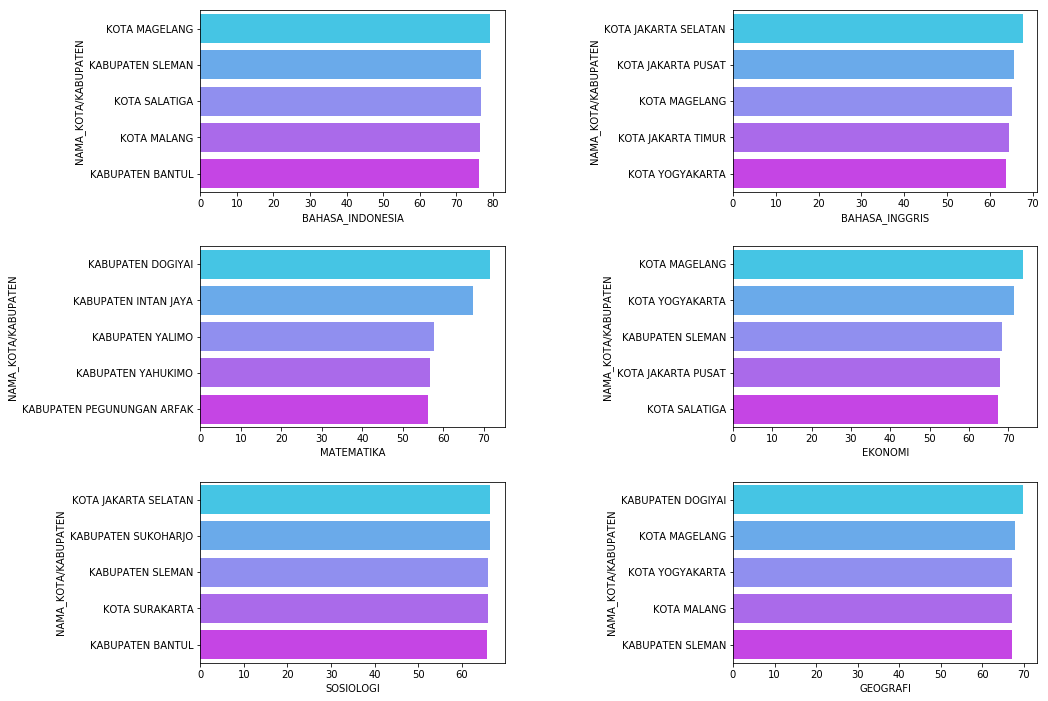

In [0]:
fig,axes = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(15, 12)
print('5 Kota dengan UN IPS Terbaik')
sns.barplot(x='BAHASA_INDONESIA', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('BAHASA_INDONESIA',ascending = False).head(5),ax=axes[0,0],palette="cool")
sns.barplot(x='BAHASA_INGGRIS', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('BAHASA_INGGRIS',ascending = False).head(5),ax=axes[0,1],palette="cool")
sns.barplot(x='MATEMATIKA', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('MATEMATIKA',ascending = False).head(5),ax=axes[1,0],palette="cool")
sns.barplot(x='EKONOMI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('EKONOMI',ascending = False).head(5),ax=axes[1,1],palette="cool")
sns.barplot(x='SOSIOLOGI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('SOSIOLOGI',ascending = False).head(5),ax=axes[2,0],palette="cool")
sns.barplot(x='GEOGRAFI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('GEOGRAFI',ascending = False).head(5),ax=axes[2,1],palette="cool")

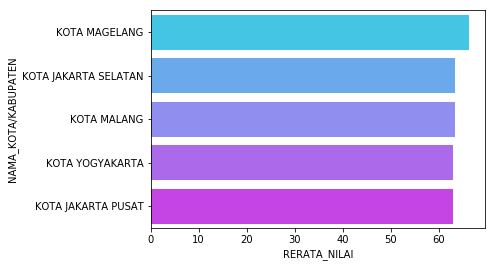

In [0]:
sns.barplot(x='RERATA_NILAI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('RERATA_NILAI',ascending = False).head(5),palette="cool")

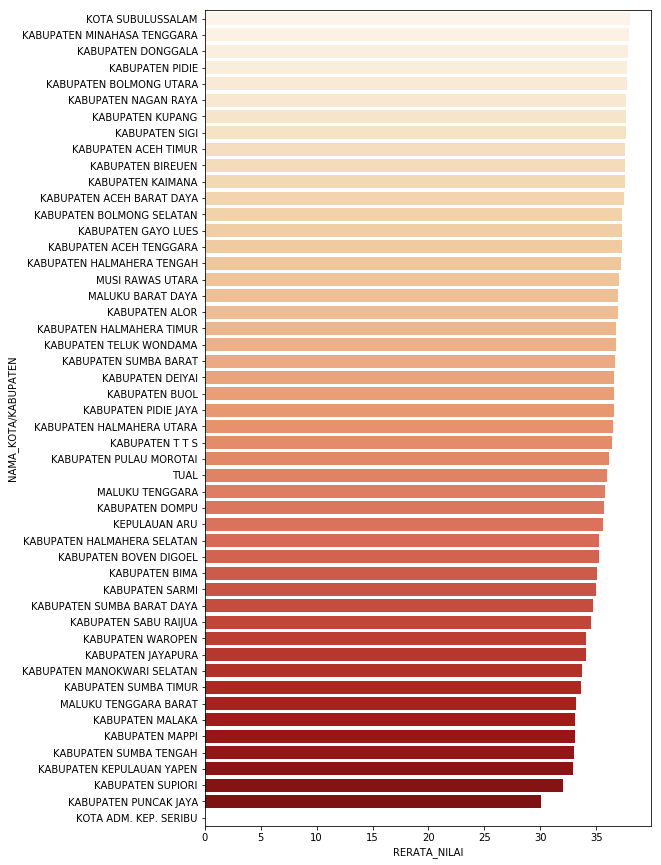

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='RERATA_NILAI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('RERATA_NILAI',ascending = False).tail(50),palette="OrRd")

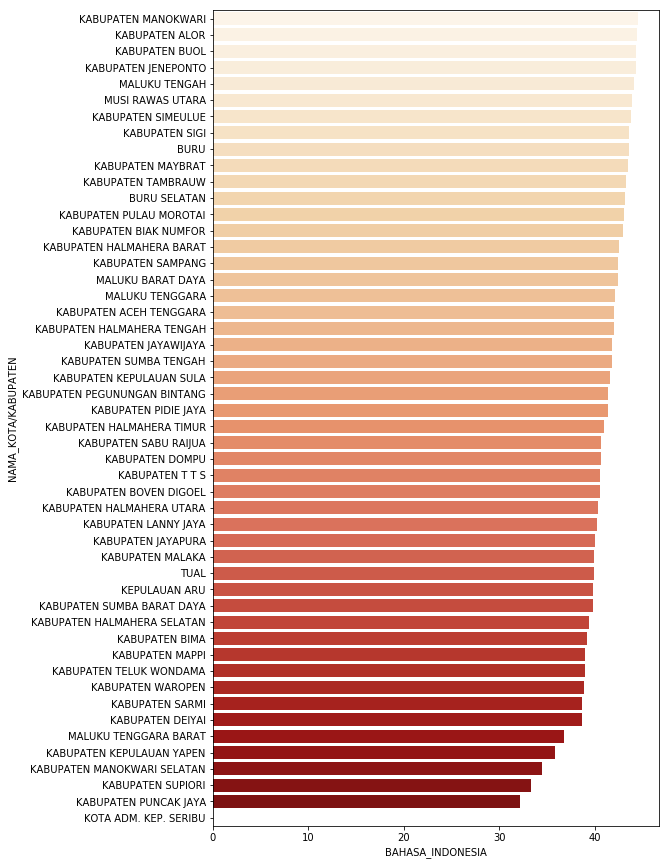

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='BAHASA_INDONESIA', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('BAHASA_INDONESIA',ascending = False).tail(50),palette="OrRd")

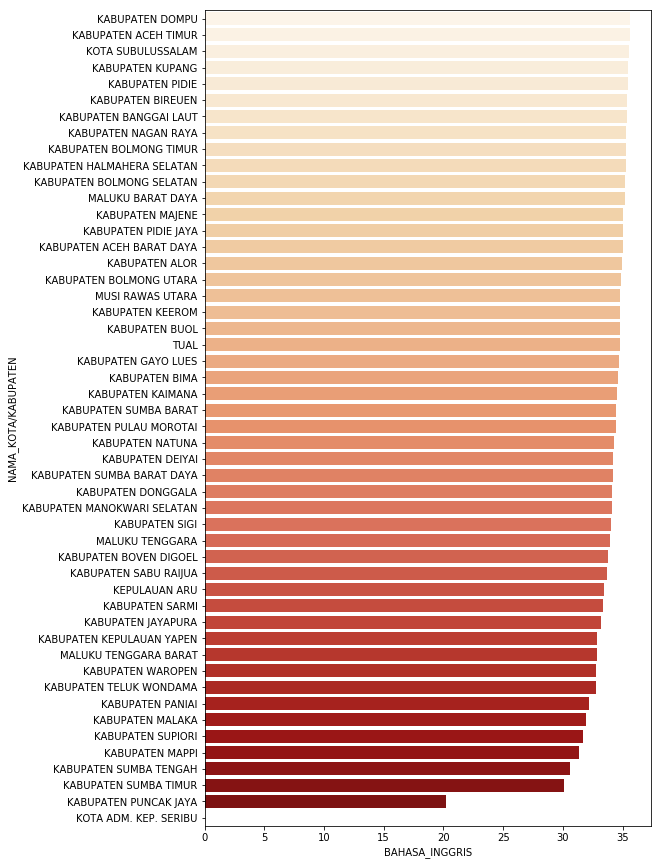

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='BAHASA_INGGRIS', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('BAHASA_INGGRIS',ascending = False).tail(50),palette="OrRd")

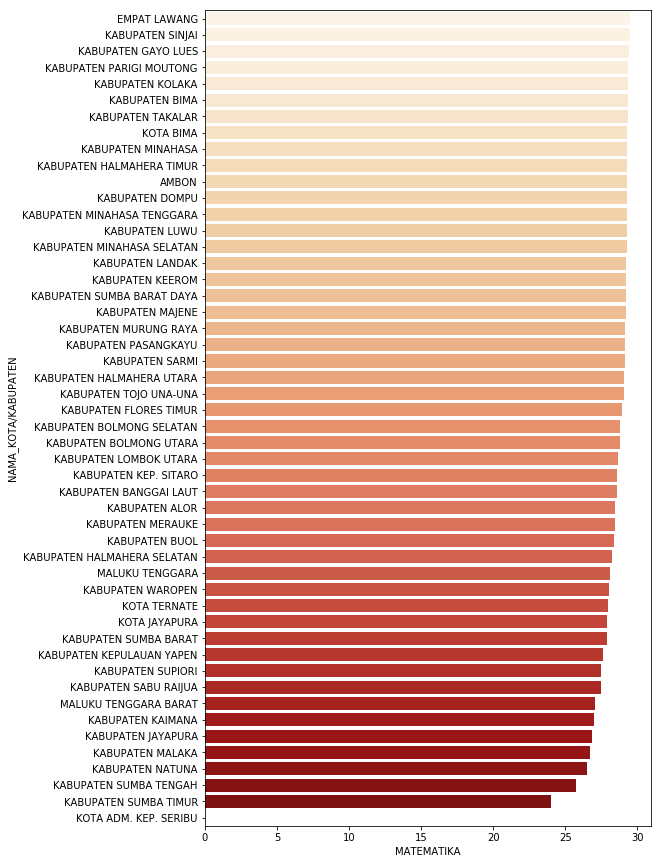

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='MATEMATIKA', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('MATEMATIKA',ascending = False).tail(50),palette="OrRd")

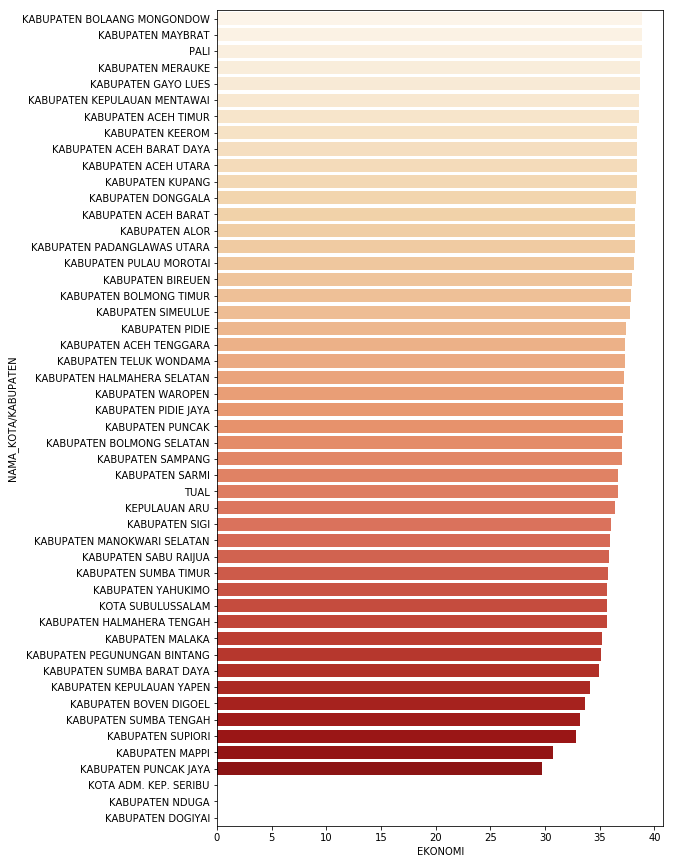

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='EKONOMI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('EKONOMI',ascending = False).tail(50),palette="OrRd")

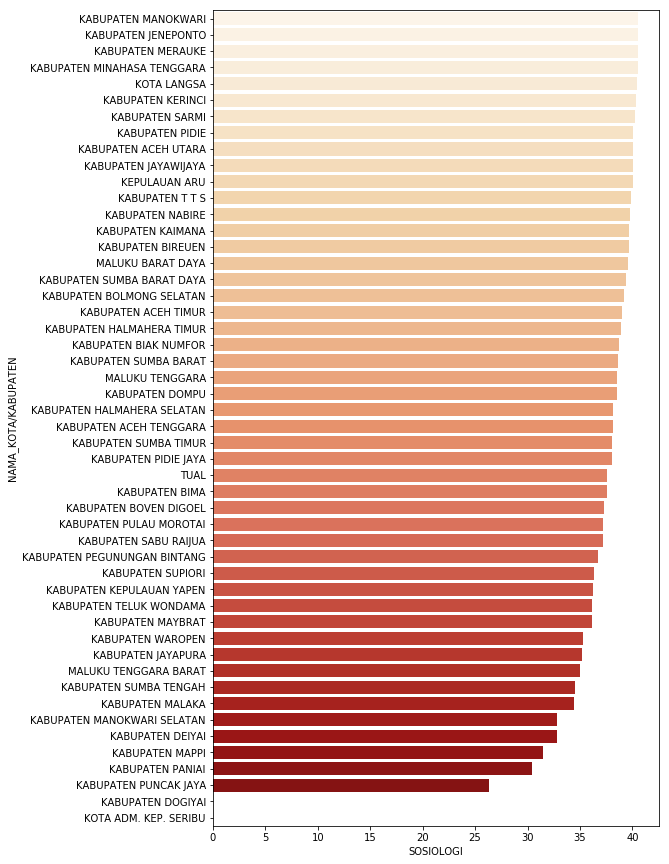

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='SOSIOLOGI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('SOSIOLOGI',ascending = False).tail(50),palette="OrRd")

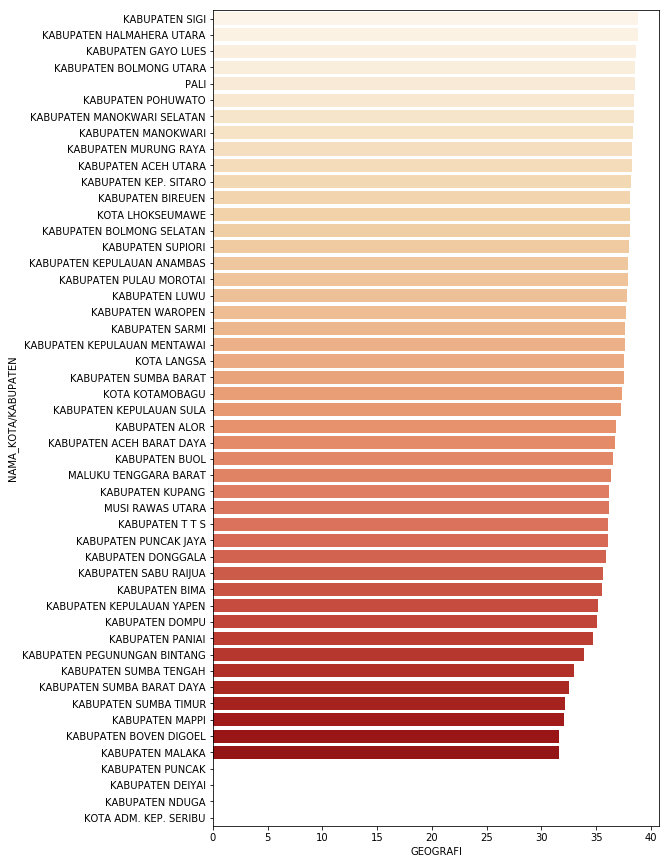

In [0]:
plt.figure(figsize=(8,15))
ax=sns.barplot(x='GEOGRAFI', y='NAMA_KOTA/KABUPATEN', data=kota.sort_values('GEOGRAFI',ascending = False).tail(50),palette="OrRd")

In [0]:
DKIs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/DKI.xlsx')
DIYs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/DIY.xlsx')
JABARs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/JABAR.xlsx')
JATENGs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/JATENG.xlsx')
JATIMs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/JATIM.xlsx')
JAMBIs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/JAMBI.xlsx')
BANTENs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/BANTEN.xlsx')
SUMSELs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SUMSEL.xlsx')
SUMUTs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SUMUT.xlsx')
SUMBARs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SUMBAR.xlsx')
LAMPUNGs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/LAMPUNG.xlsx')
RIAUs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/RIAU.xlsx')
KEPRIAUs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/KEPRIAU.xlsx')
BELITUNGs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/BELITUNG.xlsx')
BENGKULUs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/BENGKULU.xlsx')
ACEHs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/ACEH.xlsx')
KALSELs= pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/KALSEL.xlsx')
KALBARs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/KALBAR.xlsx')
KALTIMs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/KALTIM.xlsx')
KALUTs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/KALUT.xlsx')
KALTENGs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/KALTENG.xlsx')
SULSELs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SULSEL.xlsx')
SULUTs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SULUT.xlsx')
SULTENGs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SULTENG.xlsx')
SULBARs= pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SULBAR.xlsx')
SULTENGGs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/SULTENGG.xlsx')
GORONTALOs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/GORONTALO.xlsx')
MALUKUs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/MALUKU.xlsx')
MALUKUUTs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/MALUKUUT.xlsx')
NTBs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/NTB.xlsx')
NTTs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/NTT.xlsx')
BALIs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/BALI.xlsx')
PAPUAs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/PAPUA.xlsx')
PAPUABARs = pd.read_excel('/content/drive/My Drive/DATASET_UN/Provinsi/SEKOLAH/PAPUABAR.xlsx')


In [0]:
sekolah= [DKIs,DIYs,JAMBIs,JABARs,JATENGs,JATIMs,BANTENs,LAMPUNGs,BELITUNGs,SUMSELs,RIAUs,BENGKULUs,SUMUTs,SUMBARs,ACEHs,KEPRIAUs,KALTIMs,KALBARs,KALTENGs
           ,KALUTs,KALSELs,SULSELs,SULUTs,SULTENGs,SULTENGGs,SULBARs,GORONTALOs,MALUKUs,MALUKUUTs,NTBs,NTTs,BALIs,PAPUAs,PAPUABARs]
for i in sekolah :
    i.rename(columns={'Unnamed: 1':'KODE', 'Unnamed: 2':'NAMA_SATUAN_PENDIDIKAN', 'Unnamed: 3':'NPSN','Unnamed: 4':'STATUS', 'Unnamed: 5':'JUMLAH_PESERTA', 
                    'Unnamed: 6':'BAHASA_INDONESIA', 'Unnamed: 7':'BAHASA_INGGRIS', 'Unnamed: 8':'MATEMATIKA', 'Unnamed: 9':'EKONOMI',
                    'Unnamed: 10':'SOSIOLOGI', 'Unnamed: 11':'GEOGRAFI', 'Unnamed: 12':'RERATA_NILAI'},inplace=True )  
    i.dropna(inplace = True)
    i.drop(['CAPAIAN NILAI UJIAN NASIONAL'],axis=1)

In [0]:
SMA = pd.concat(sekolah)
SMA = SMA.drop(['CAPAIAN NILAI UJIAN NASIONAL'],axis=1)
SMA = SMA.sort_values('KODE',ascending = True)
SMA = SMA.reset_index()
SMA = SMA.drop(['index'],axis=1)
SMA.tail()

,KODE,NAMA_SATUAN_PENDIDIKAN,NPSN,STATUS,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI
19073,34040021,SMAN 15 MALINAU,69949854,N,9,57.33,36.22,30,-,51.71,46,43.5
19074,34040022,SMAN 16 MALINAU,69947936,N,12,40,34.17,28.54,-,-,31.67,33.6
19075,34050001,SMA NEGERI TERPADU UNGGULAN 1 TANA TIDUNG,30402592,N,73,61.64,40.38,30.21,48,55.84,44.93,45.92
19076,34050002,SMA NEGERI 1 TANA TIDUNG,30402587,N,44,55.64,42.55,33.01,61.07,46.13,42.55,44.48
19077,34050003,SMA NEGERI 2 TANA TIDUNG,30402589,N,18,58.67,39.44,29.58,51.25,49.75,42,43.8


In [0]:
SMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19078 entries, 0 to 19077
Data columns (total 12 columns):
KODE                      19078 non-null object
NAMA_SATUAN_PENDIDIKAN    19078 non-null object
NPSN                      19078 non-null object
STATUS                    19078 non-null object
JUMLAH_PESERTA            19078 non-null object
BAHASA_INDONESIA          19078 non-null object
BAHASA_INGGRIS            19078 non-null object
MATEMATIKA                19078 non-null object
EKONOMI                   19078 non-null object
SOSIOLOGI                 19078 non-null object
GEOGRAFI                  19078 non-null object
RERATA_NILAI              19078 non-null object
dtypes: object(12)
memory usage: 1.7+ MB


In [0]:
SMA.describe()

,KODE,NAMA_SATUAN_PENDIDIKAN,NPSN,STATUS,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI
count,19078,19078,19078,19078,19078,19078,19078,19078,19078,19078,19078,19078.00
unique,19078,18247,19073,2,286,4644,3659,2813,2551,3792,3152,3766.00
top,09050129,MA MIFTAHUL ULUM,20515427,S,20,56,36,30,-,-,-,40.51
freq,1,40,2,11833,543,65,151,297,7443,1877,6836,22.00


In [0]:

SMA = SMA.replace('-','0')
SMA[['BAHASA_INDONESIA', 'BAHASA_INGGRIS','MATEMATIKA','EKONOMI','SOSIOLOGI','GEOGRAFI']] = SMA[['BAHASA_INDONESIA', 
                                                                                                'BAHASA_INGGRIS','MATEMATIKA',
                                                                                                'EKONOMI','SOSIOLOGI','GEOGRAFI']].apply(pd.to_numeric)

5 Sekolah dengan nilai terbaik IPS


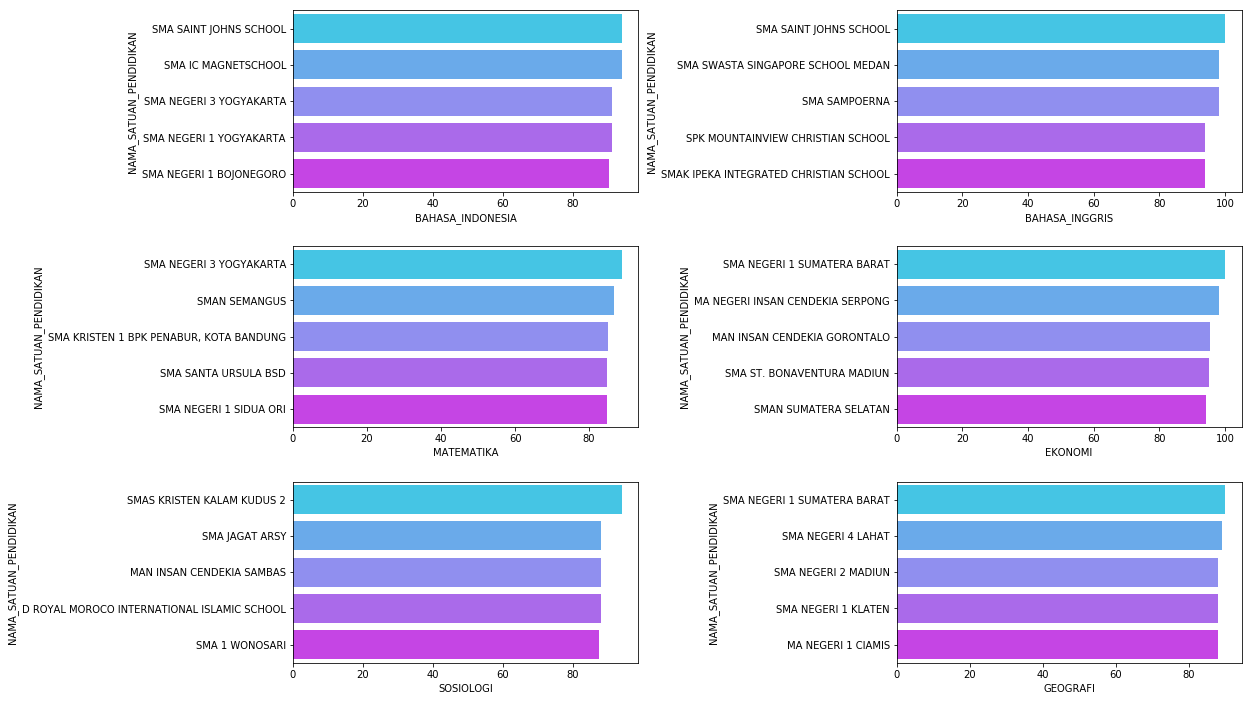

In [0]:
fig,axes = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(17, 12)
print('5 Sekolah dengan nilai terbaik IPS')
sns.barplot(x='BAHASA_INDONESIA', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('BAHASA_INDONESIA',ascending = False).head(5),ax=axes[0,0],palette="cool")
sns.barplot(x='BAHASA_INGGRIS', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('BAHASA_INGGRIS',ascending = False).head(5),ax=axes[0,1],palette="cool")
sns.barplot(x='MATEMATIKA', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('MATEMATIKA',ascending = False).head(5),ax=axes[1,0],palette="cool")
sns.barplot(x='EKONOMI', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('EKONOMI',ascending = False).head(5),ax=axes[1,1],palette="cool")
sns.barplot(x='SOSIOLOGI', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('SOSIOLOGI',ascending = False).head(5),ax=axes[2,0],palette="cool")
sns.barplot(x='GEOGRAFI', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('GEOGRAFI',ascending = False).head(5),ax=axes[2,1],palette="cool")

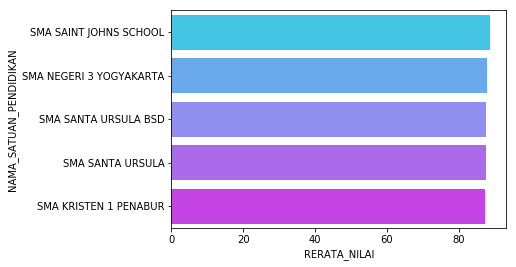

In [0]:
sns.barplot(x='RERATA_NILAI', y='NAMA_SATUAN_PENDIDIKAN', data=SMA.sort_values('RERATA_NILAI',ascending = False).head(5),palette="cool")

In [0]:
negeri = SMA[SMA['STATUS'] == 'N']
swasta = SMA[SMA['STATUS'] == 'S']
negeri=negeri.reset_index()
negeri=negeri.drop(['index'],axis=1)
swasta=swasta.reset_index()
swasta=swasta.drop(['index'],axis=1)


In [0]:
negeri.tail()

,KODE,NAMA_SATUAN_PENDIDIKAN,NPSN,STATUS,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI
7240,34040021,SMAN 15 MALINAU,69949854,N,9,57.33,36.22,30.00,0.00,51.71,46.00,43.50
7241,34040022,SMAN 16 MALINAU,69947936,N,12,40.00,34.17,28.54,0.00,0.00,31.67,33.60
7242,34050001,SMA NEGERI TERPADU UNGGULAN 1 TANA TIDUNG,30402592,N,73,61.64,40.38,30.21,48.00,55.84,44.93,45.92
7243,34050002,SMA NEGERI 1 TANA TIDUNG,30402587,N,44,55.64,42.55,33.01,61.07,46.13,42.55,44.48
7244,34050003,SMA NEGERI 2 TANA TIDUNG,30402589,N,18,58.67,39.44,29.58,51.25,49.75,42.00,43.80


In [0]:
swasta.tail()

,KODE,NAMA_SATUAN_PENDIDIKAN,NPSN,STATUS,JUMLAH_PESERTA,BAHASA_INDONESIA,BAHASA_INGGRIS,MATEMATIKA,EKONOMI,SOSIOLOGI,GEOGRAFI,RERATA_NILAI
11828,34030011,MA AL-KHAIRAT NUNUKAN,30315193,S,10,55.40,36.40,30.75,45.00,47.11,0.00,42.37
11829,34030012,MA YIIPS SEBATIK,30315194,S,28,50.43,35.93,29.91,0.00,46.15,46.00,40.61
11830,34040002,SMA PEMBANGUNAN MALINAU,30402830,S,30,38.87,33.87,29.58,0.00,38.24,35.69,34.87
11831,34040003,SMA DARMA BAKTI MALINAU,30400461,S,10,60.40,35.20,28.50,41.67,42.00,44.00,41.80
11832,34040006,SMA KATOLIK HENRICUS LEVEN MALINAU,30402827,S,6,53.33,40.33,26.67,0.00,46.00,44.00,41.34


5 SMA Negeri jurusan IPS dengan nilai terbaik


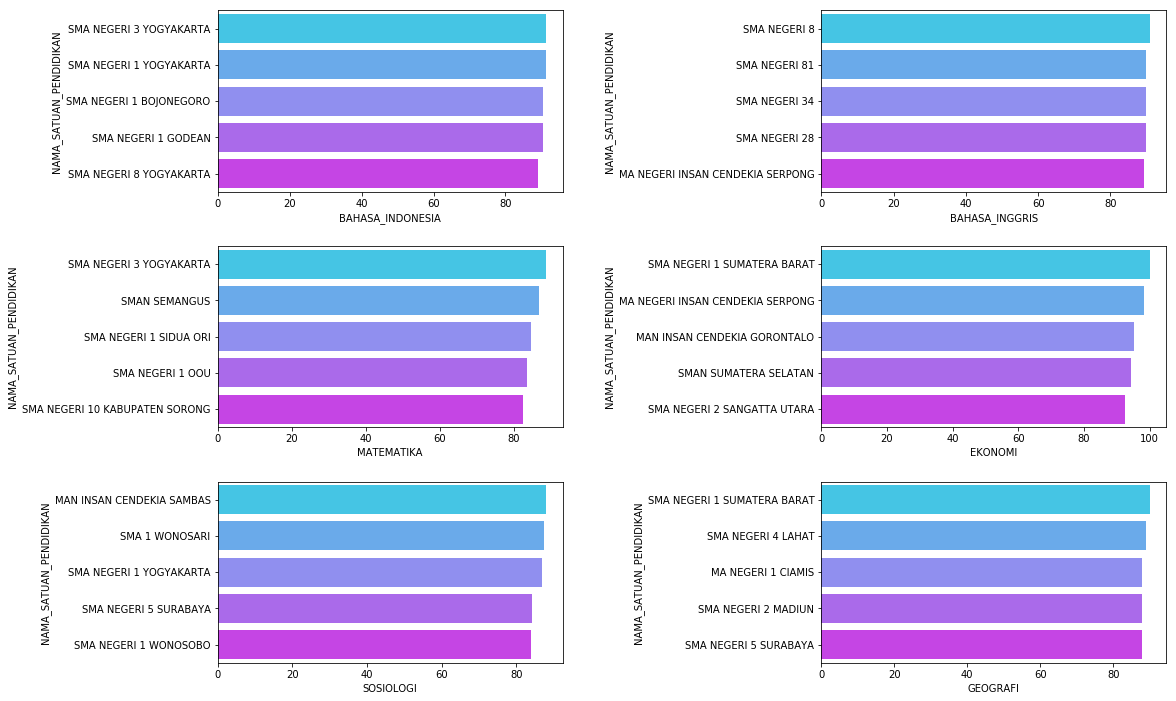

In [0]:
fig,axes = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(17, 12)
print('5 SMA Negeri jurusan IPS dengan nilai terbaik')
sns.barplot(x='BAHASA_INDONESIA', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('BAHASA_INDONESIA',ascending = False).head(5),ax=axes[0,0],palette="cool")
sns.barplot(x='BAHASA_INGGRIS', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('BAHASA_INGGRIS',ascending = False).head(5),ax=axes[0,1],palette="cool")
sns.barplot(x='MATEMATIKA', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('MATEMATIKA',ascending = False).head(5),ax=axes[1,0],palette="cool")
sns.barplot(x='EKONOMI', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('EKONOMI',ascending = False).head(5),ax=axes[1,1],palette="cool")
sns.barplot(x='SOSIOLOGI', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('SOSIOLOGI',ascending = False).head(5),ax=axes[2,0],palette="cool")
sns.barplot(x='GEOGRAFI', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('GEOGRAFI',ascending = False).head(5),ax=axes[2,1],palette="cool")

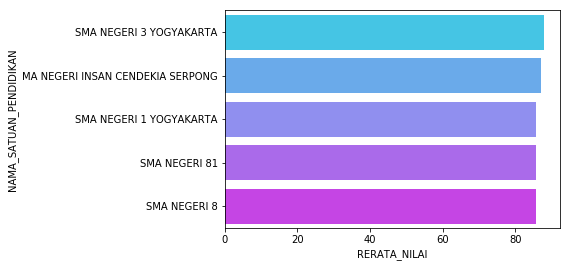

In [0]:
sns.barplot(x='RERATA_NILAI', y='NAMA_SATUAN_PENDIDIKAN', data=negeri.sort_values('RERATA_NILAI',ascending = False).head(5),palette="cool")

5 SMA Swasta jurusan IPS dengan nilai terbaik 


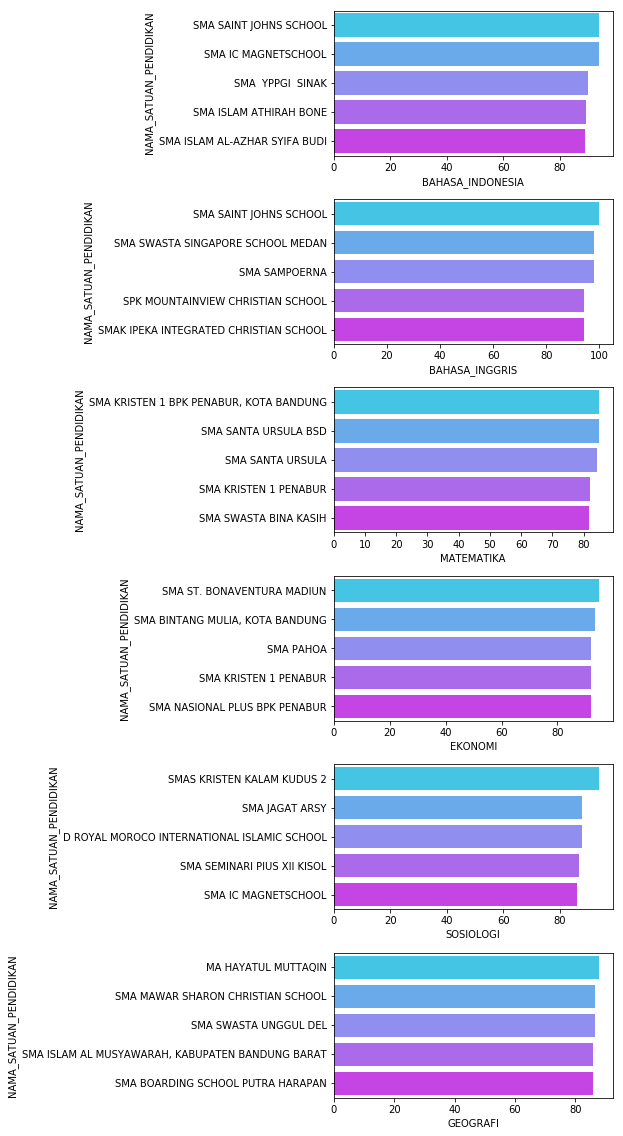

In [0]:
fig,axes = plt.subplots(6)
plt.subplots_adjust(wspace=0.75, hspace=0.3)
fig.set_size_inches(5, 20)
print('5 SMA Swasta jurusan IPS dengan nilai terbaik ')
sns.barplot(x='BAHASA_INDONESIA', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('BAHASA_INDONESIA',ascending = False).head(5),ax=axes[0],palette="cool")
sns.barplot(x='BAHASA_INGGRIS', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('BAHASA_INGGRIS',ascending = False).head(5),ax=axes[1],palette="cool")
sns.barplot(x='MATEMATIKA', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('MATEMATIKA',ascending = False).head(5),ax=axes[2],palette="cool")
sns.barplot(x='EKONOMI', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('EKONOMI',ascending = False).head(5),ax=axes[3],palette="cool")
sns.barplot(x='SOSIOLOGI', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('SOSIOLOGI',ascending = False).head(5),ax=axes[4],palette="cool")
sns.barplot(x='GEOGRAFI', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('GEOGRAFI',ascending = False).head(5),ax=axes[5],palette="cool")

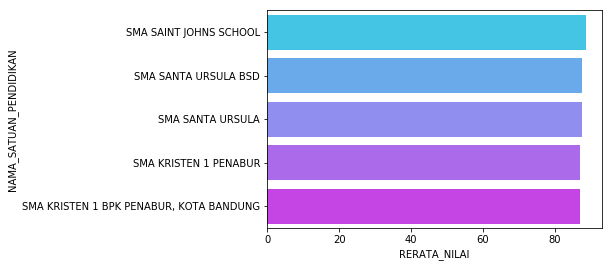

In [0]:
sns.barplot(x='RERATA_NILAI', y='NAMA_SATUAN_PENDIDIKAN', data=swasta.sort_values('RERATA_NILAI',ascending = False).head(5),palette="cool")